In [73]:
#importando pandas e matplotlib 
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
#incluindo o caminho do arquivo
path_arq = "/home/malu/time-series-analysis/jena_climate_2009_2016.csv"

data = pd.read_csv(path_arq, parse_dates=['Date Time'], index_col='Date Time')


In [75]:
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [76]:
#correlação entre duas variaveis
correlation = data['Tdew (degC)'].corr(data['T (degC)'])
print("correlação entre Temperatura do ponto de orvalho e temperatura: ", correlation)


correlação entre Temperatura do ponto de orvalho e temperatura:  0.8957080926670664


In [77]:
#calcular a variação percentual entre valores consecutivos em uma série de dados
# retorna a variação percentual entre o valor atual e o valor anterior na série original.

changes = data.pct_change()

In [78]:
#retorna a correlação da alteração percentual entre as variáveis
correlation2 = changes['Tdew (degC)'].corr(changes['T (degC)'])
print("Correlation of changes: ", correlation2)

Correlation of changes:  nan


/home/malu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<Axes: xlabel='Date Time'>

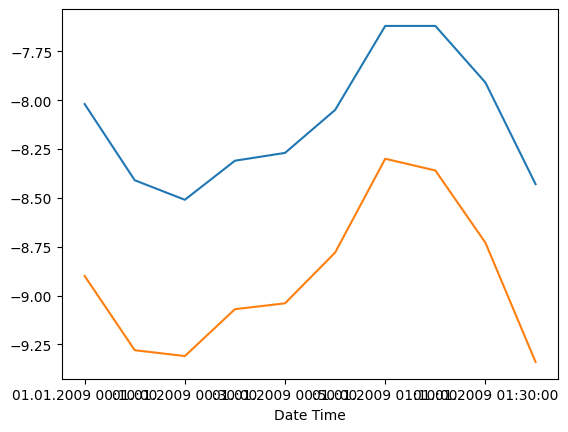

In [79]:
data['T (degC)'][:10].plot()
data['Tdew (degC)'][:10].plot()

In [80]:
#importando a statsmodels, biblioteca de estatistica
import statsmodels.api as sm

data = data.dropna()
temp = data['T (degC)']
tempDew = data['Tdew (degC)']

correlation = temp.corr(tempDew)
#%4.2f formata um número de ponto flutuante com no mínimo 4 caracteres, sendo 2 deles após o ponto decimal
print("The correlation between temperatura and temperatura de ponto de orvalho is %4.2f" %(correlation))

The correlation between temperatura and temperatura de ponto de orvalho is 0.90


In [81]:
#cria um novo dataframe 
dfx  = pd.DataFrame(temp.values, columns=['Temperatura'])
dfx

,Temperatura
0,-8.02
1,-8.41
2,-8.51
3,-8.31
4,-8.27
...,...
420546,-4.05
420547,-3.35
420548,-3.16
420549,-4.23


In [82]:
dfx1 = sm.add_constant(dfx)
dfx1


,const,Temperatura
0,1.0,-8.02
1,1.0,-8.41
2,1.0,-8.51
3,1.0,-8.31
4,1.0,-8.27
...,...,...
420546,1.0,-4.05
420547,1.0,-3.35
420548,1.0,-3.16
420549,1.0,-4.23


In [83]:
#tempDew é a vraiavel dependente, e dfx1 variavel independente 
result = sm.OLS(tempDew.values, dfx1).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.707e+06
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:28:34   Log-Likelihood:            -1.0577e+06
No. Observations:              420551   AIC:                         2.115e+06
Df Residuals:                  420549   BIC:                         2.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8077      0.007   -260.647      

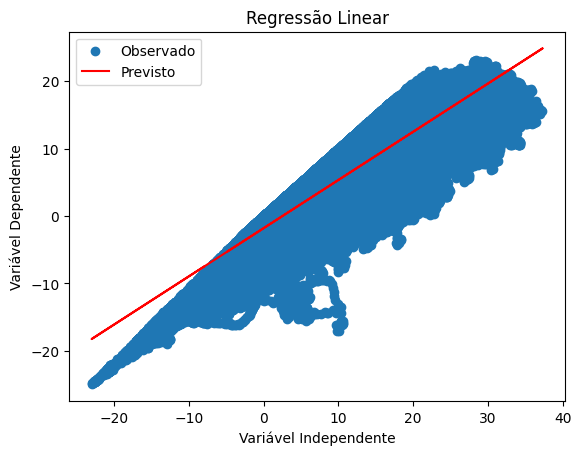

In [84]:
plt.scatter(dfx1.iloc[:, 1], tempDew.values, label='Observado')  # Plotar os dados observados
plt.plot(dfx1.iloc[:, 1], result.predict(), color='red', label='Previsto')  # Plotar a linha de regressão
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Regressão Linear')
plt.legend()
plt.show()

In [85]:
from statsmodels.tsa.stattools import acf  #função de autocorrelação de uma série temporal
from statsmodels.graphics.tsaplots import plot_acf #visualizar a função de autocorrelação

#calculando a autocorrelação do dataframe dfx que possui apenas a coluna temperatura
# medida estatística que descreve a correlação entre uma série temporal e versões atrasadas (ou defasadas) de si mesma
ex = acf(dfx)
print(ex)

[1.         0.99955717 0.99865326 0.99750922 0.9961293  0.99450744
 0.99264756 0.9905587  0.98824999 0.9857282  0.98300221 0.98008286
 0.97697923 0.97370077 0.97025635 0.96665671 0.9629117  0.95903055
 0.95502144 0.95089401 0.94665753 0.94232542 0.93790863 0.93341598
 0.92885597 0.92423597 0.91956431 0.91485063 0.91010372 0.90533101
 0.90053879 0.89573535 0.8909284  0.88612594 0.88133703 0.87656916
 0.87182677 0.86711508 0.86244178 0.85781636 0.85324313 0.84872881
 0.84428074 0.83990395 0.83560286 0.83138276 0.82724747 0.82320175
 0.81924983 0.8153961  0.81164678 0.80800773 0.80448269 0.80107533
 0.79779078 0.79463423 0.79161104]


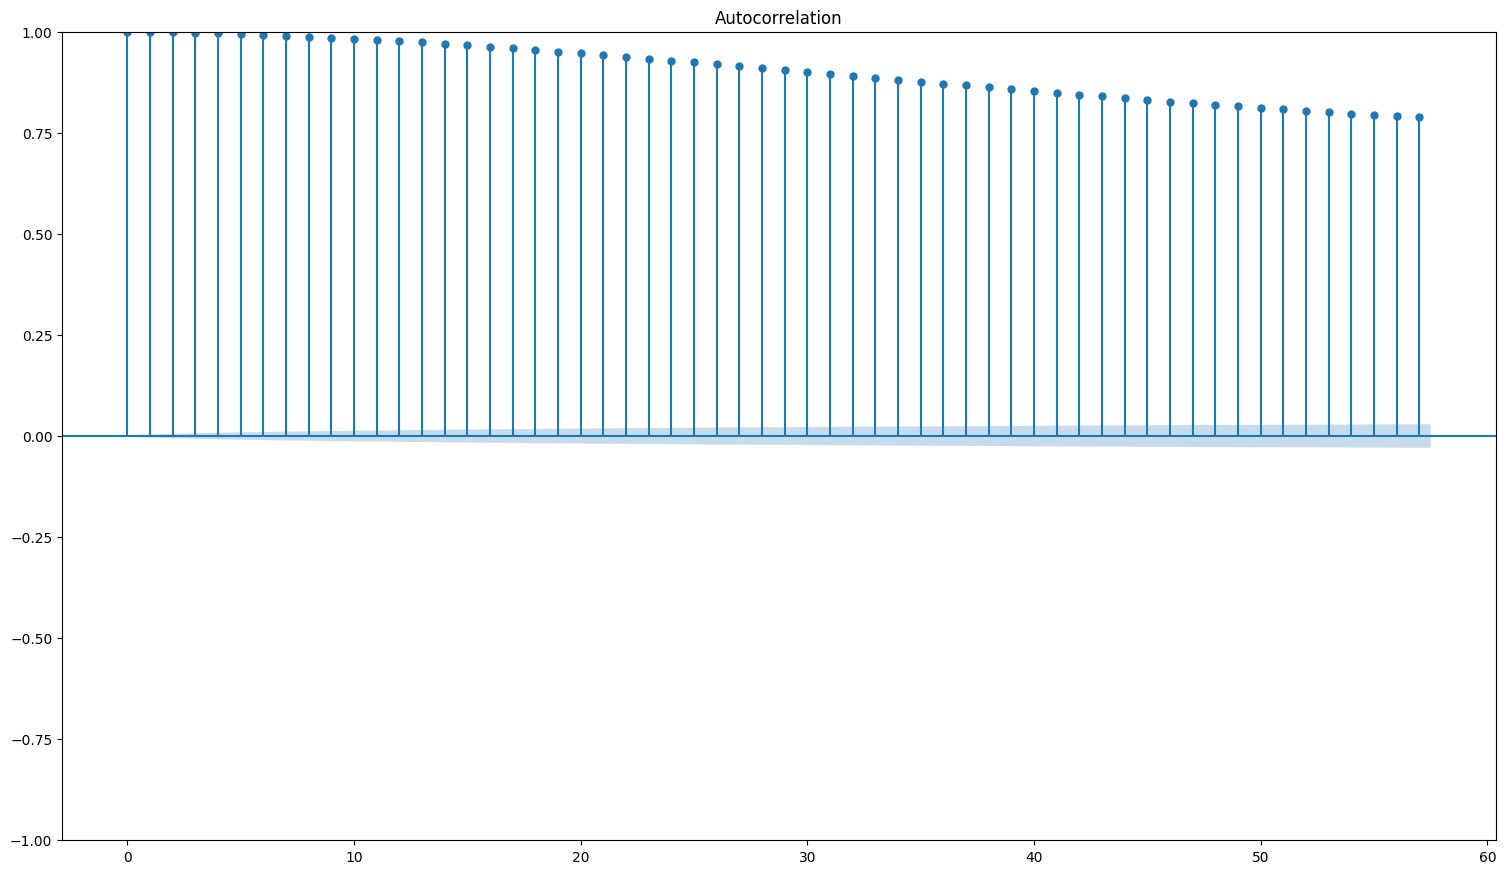

In [86]:
dfx

# Plot the acf function
fig = plot_acf(dfx, alpha=0.05)
fig.set_size_inches(18.5, 10.5)

plt.show()

In [87]:
import numpy as np
#ruido branco 
ruido = np.random.normal(loc=0, scale=1, size=500)

In [88]:
exemplo1 = np.random.random([10, 3])
exemplo2 = np.random.normal(loc = 0, scale = 1, size = 500)
#loc é a media da distribuição normal, por padrão é 0; scale é o desvio padrão da distribuição normal, por padrão é 1; size é o tamanho do array

exemplo2


array([ 2.36671555e-01,  5.81352630e-01, -7.80103176e-01,  2.02306348e+00,
       -1.50328385e+00, -9.79353933e-01,  7.47899848e-01,  1.24179068e-01,
       -1.98449266e-01,  4.59920121e-01,  5.79036849e-01, -1.09814453e+00,
       -1.39027773e-01, -4.33513785e-01,  9.58933946e-02, -5.53769181e-01,
        2.99440516e-01, -2.84574198e-01,  7.41697969e-01, -7.10238242e-01,
        2.05828424e-01,  1.68951236e+00,  7.03324353e-01,  1.21063862e+00,
        1.35516211e+00,  2.31697286e+00,  7.35744625e-01, -1.24048265e-01,
       -4.23439129e-01,  8.02770840e-01,  7.84498964e-01,  3.99189031e-01,
       -4.08856485e-01,  4.17506212e-01, -1.43080851e+00,  5.19922700e-02,
       -5.83353919e-01,  2.74110571e-01, -9.03359597e-01, -7.67149194e-01,
       -6.96906969e-01, -1.17885580e+00, -3.40723902e-01,  8.54423697e-01,
       -1.60691123e+00, -1.03402305e+00, -1.43179576e+00, -9.92068921e-02,
        8.51104536e-01, -9.65977334e-01,  7.05661975e-01, -1.26737547e+00,
       -6.56528781e-01,  

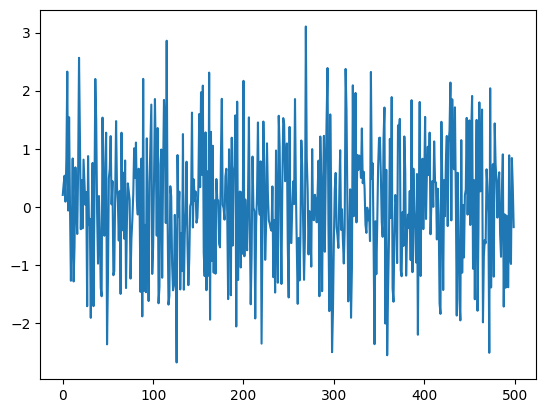

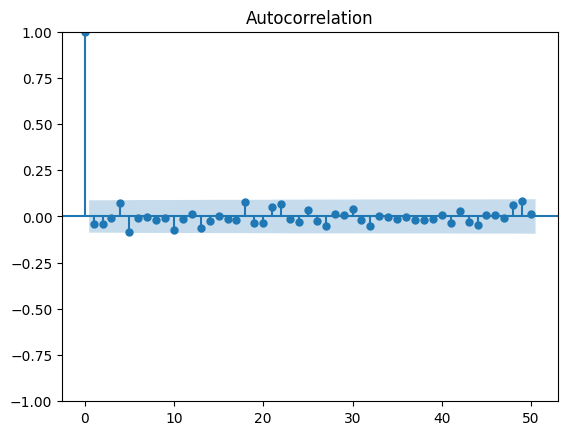

In [89]:
plt.plot(ruido)
plt.show()
plot_acf(ruido, lags=50) #lags é o atraso 
plt.show()

In [90]:
#random walk
#A função adfuller é utilizada para realizar o teste de Dickey-Fuller Aumentado (ADF), que é uma ferramenta estatística comumente usada para testar a estacionariedade de uma série temporal. 
from statsmodels.tsa.stattools import adfuller

In [91]:
data = pd.read_csv(path_arq, parse_dates=['Date Time'], index_col='Date Time')
data = data.dropna() #retira os nan
SH = data['sh (g/kg)']
SH

Date Time
01.01.2009 00:10:00    1.94
01.01.2009 00:20:00    1.89
01.01.2009 00:30:00    1.88
01.01.2009 00:40:00    1.92
01.01.2009 00:50:00    1.92
                       ... 
31.12.2016 23:20:00    2.06
31.12.2016 23:30:00    2.07
31.12.2016 23:40:00    2.05
31.12.2016 23:50:00    1.99
01.01.2017 00:00:00    2.01
Name: sh (g/kg), Length: 420551, dtype: float64

In [92]:
SH_half = SH[:500]

In [93]:
results = adfuller(SH_half)
results[1]

0.658631194143068

Text(0.5, 1.0, 'Titulo da figura 1')

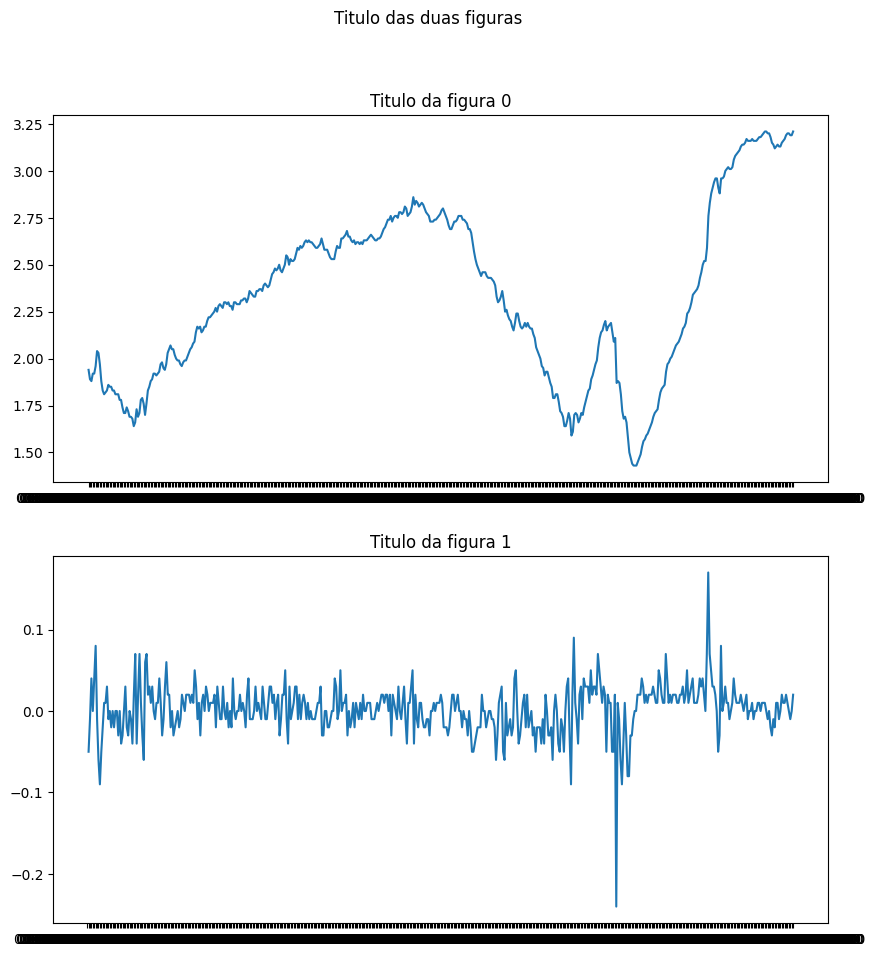

In [94]:

# #Stationary
fig, axs = plt.subplots(2) #cria uma figura com dois graficos 
fig.suptitle('Titulo das duas figuras')
fig.set_size_inches(10, 10.5)
axs[0].plot(SH_half)
axs[0].set_title('Titulo da figura 0')

axs[1].plot(SH_half.diff()) #diferença entre cada valor da série e seu anterior 
axs[1].set_title('Titulo da figura 1')

Text(0.5, 1.0, 'Titulo da figura 1')

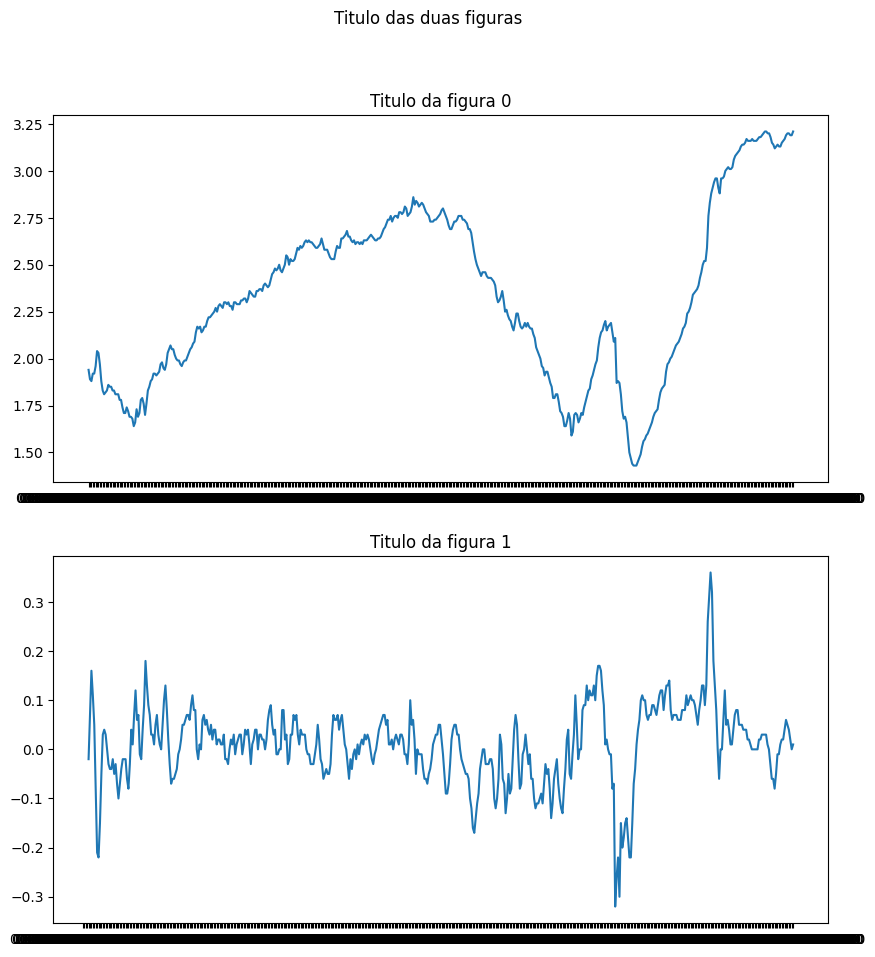

In [95]:

# #Stationary
fig, axs = plt.subplots(2) #cria uma figura com dois graficos 
fig.suptitle('Titulo das duas figuras')
fig.set_size_inches(10, 10.5)

axs[0].plot(SH_half)
axs[0].set_title('Titulo da figura 0')

axs[1].plot(SH_half.diff(4)) #diferença entre cada valor da série e seu anterior 
axs[1].set_title('Titulo da figura 1')

Text(0.5, 1.0, 'Titulo da figura 2')

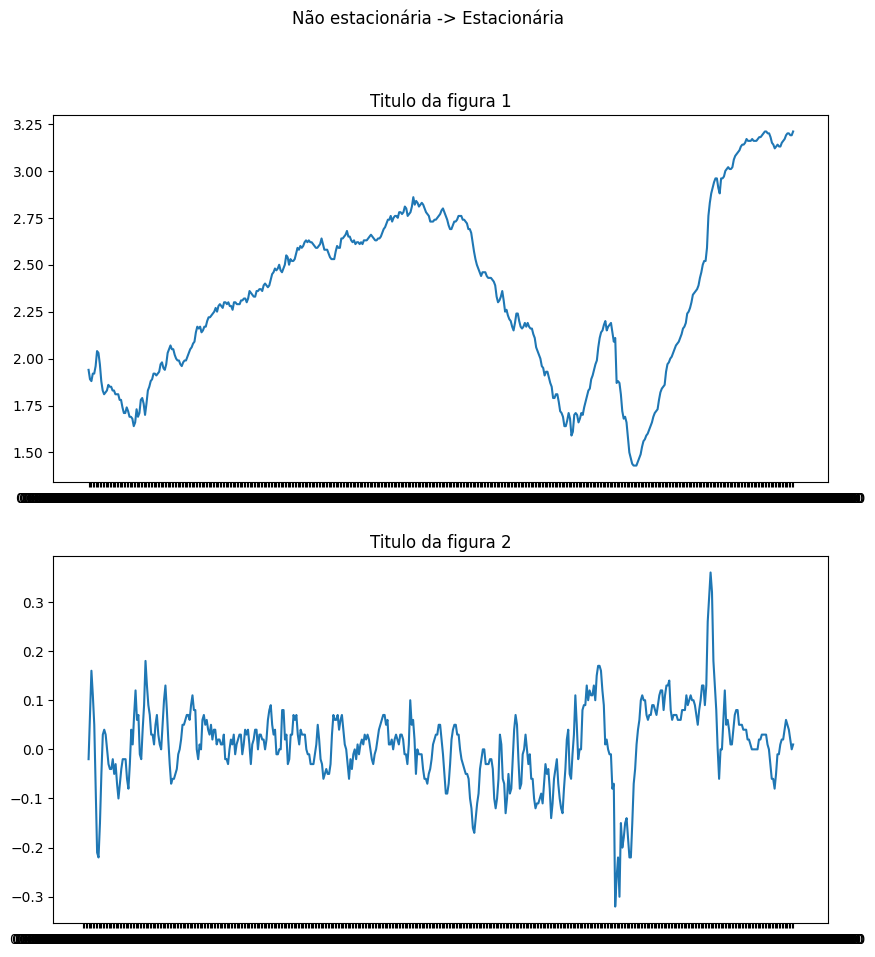

In [96]:
#trasnfromando uma serie não estacionária em uma série estacionária 
fig, axs = plt.subplots(2)
fig.suptitle('Não estacionária -> Estacionária')
fig.set_size_inches(10, 10.5)


axs[0].plot(SH_half)
axs[0].set_title('Titulo da figura 1')
axs[1].plot(SH_half.diff(4)) #calcula a diferença entre o valor atual e o 4°anterior 
#ex: [10, 12, 15, 18, 22, 25, 27, 30] -> [NaN, NaN, NaN, NaN, 12.0, 13.0, 12.0, 12.0]
axs[1].set_title('Titulo da figura 2')

Text(0.5, 1.0, 'Titulo da figura 2')

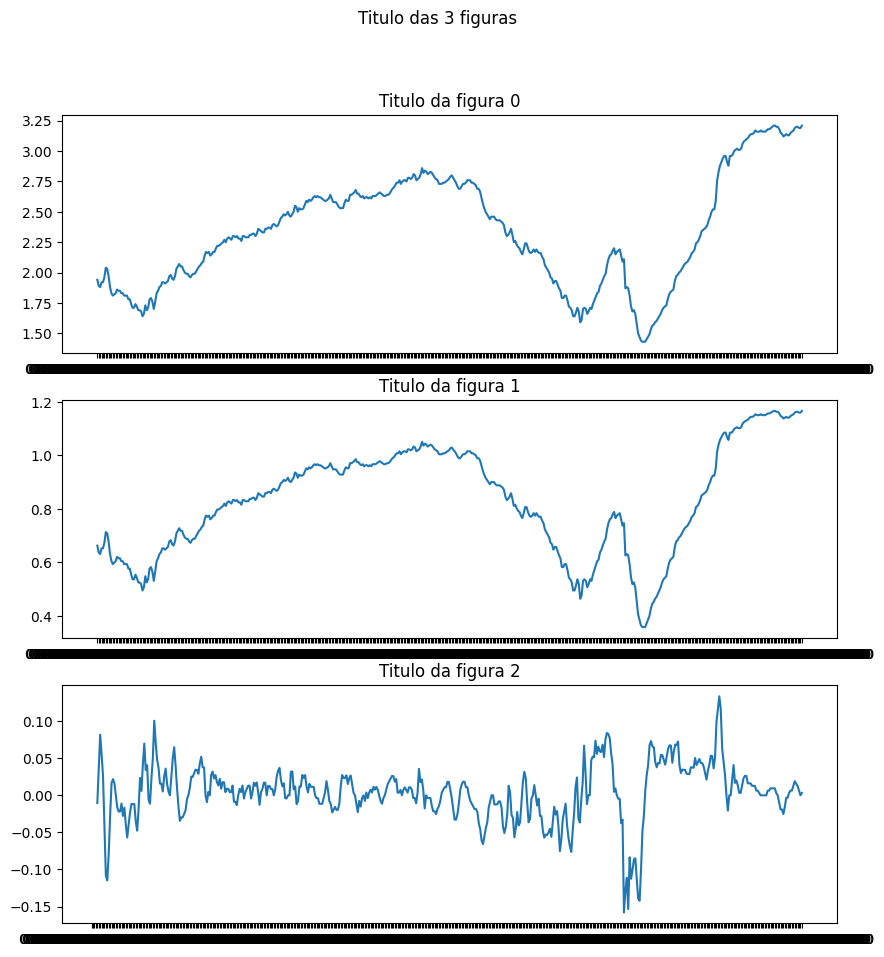

In [101]:
fig, axs = plt.subplots(3) #3 graficos em uma imagem só
fig.suptitle ('Titulo das 3 figuras')
fig.set_size_inches(10, 10.5)


axs[0].plot(SH_half)
axs[0].set_title('Titulo da figura 0')

axs[1].plot(np.log(SH_half)) #log
axs[1].set_title('Titulo da figura 1')

axs[2].plot(np.log(SH_half).diff(4)) #Diferença sazonal 
axs[2].set_title('Titulo da figura 2')

In [ ]:
#3. Modelos autoregressivos 